In [26]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [46]:
df = pd.read_csv('path.csv')

df = df.iloc[:-7,:]

df['x'] = (df[' distance / mm'] * np.sin(df[' angle gyro / °'] * np.pi/180)).cumsum()
df['y'] = (df[' distance / mm'] * np.cos(df[' angle gyro / °'] * np.pi/180)).cumsum()

df

,time / s,distance / mm,angle motors / °,angle gyro / °,x,y
0,11.904,0.000,0,0.000000,0.000000,0.000000
1,40.100,2.466,0,-1.013133,-0.043603,2.465614
2,50.281,0.476,87,85.103189,0.430660,2.506247
3,72.711,1.623,253,250.243902,-1.096810,1.957645
4,79.430,0.080,390,387.016886,-1.060470,2.028915
5,99.780,1.535,443,437.673546,0.439144,2.356609
6,107.780,0.282,509,493.395872,0.644052,2.162865
7,128.631,1.534,606,588.630394,-0.507157,1.149023
8,150.601,1.585,764,743.639775,0.128405,2.601017
9,161.872,0.567,869,849.005629,0.569011,2.244149


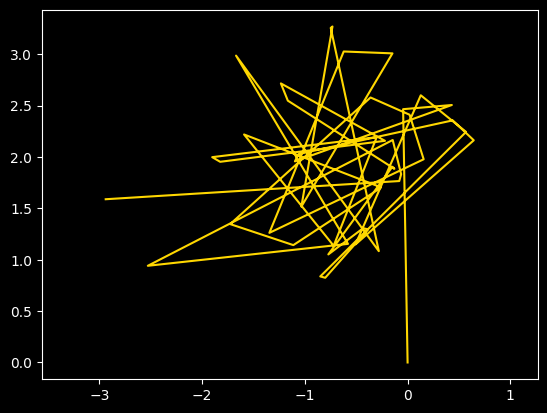

In [47]:
df['angle error'] = df[' angle gyro / °'] * 1.005
df['xe'] = (df[' distance / mm'] * np.sin(df['angle error'] * np.pi/180)).cumsum()
df['ye'] = (df[' distance / mm'] * np.cos(df['angle error'] * np.pi/180)).cumsum()

plt.plot(df['x'], df['y'], color='gold')
# plt.plot(df['xe'], df['ye'])
plt.axis('equal')
plt.show()

# plt.savefig('path.png', transparent=True)

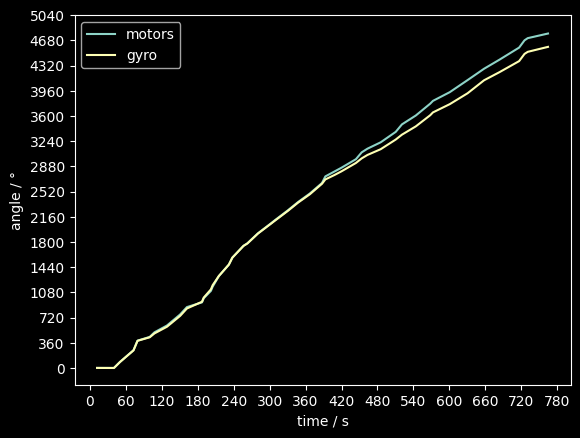

In [48]:
plt.plot(df['time / s'], df[' angle motors / °'], label = 'motors')
plt.plot(df['time / s'], df[' angle gyro / °']  , label = 'gyro')
plt.legend()
plt.xlabel('time / s')
plt.ylabel('angle / °')
plt.xticks([x*60  for x in range(0,14)])
plt.yticks([x*360 for x in range(0,15)])
plt.show()

# plt.savefig('angles.png', transparent=True)

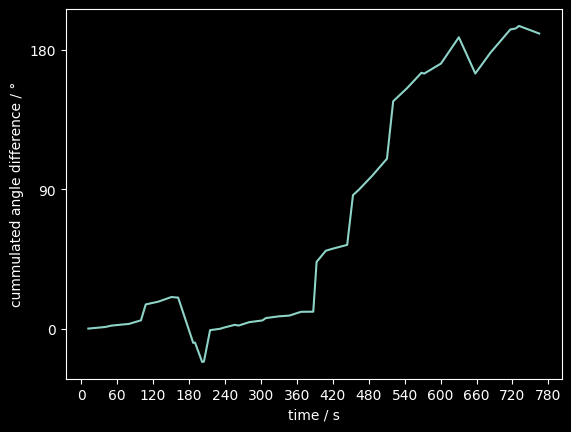

In [49]:
plt.plot(df['time / s'], (df[' angle motors / °'] - df[' angle gyro / °']) )
plt.xlabel('time / s')
plt.ylabel('cummulated angle difference / °')
plt.xticks([x*60  for x in range(0,14)])
plt.yticks([x*90 for x in range(0,3)])
plt.show()